In [1]:
from numpy import random
import torch
from helpers import MCSims, plot_field_xy_compare
from models.auto_encoder import AutoEncoder
from torchsummary import summary

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

summary(AutoEncoder([[7], [7], [5], [5], [3], [3]]).to(device), (3, 97, 97, 97))


----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv3d-1        [-1, 4, 97, 97, 97]           4,120
       BatchNorm3d-2        [-1, 4, 97, 97, 97]               8
              ReLU-3        [-1, 4, 97, 97, 97]               0
              ReLU-4        [-1, 4, 97, 97, 97]               0
              ReLU-5        [-1, 4, 97, 97, 97]               0
              ReLU-6        [-1, 4, 97, 97, 97]               0
              ReLU-7        [-1, 4, 97, 97, 97]               0
              ReLU-8        [-1, 4, 97, 97, 97]               0
              ReLU-9        [-1, 4, 97, 97, 97]               0
             ReLU-10        [-1, 4, 97, 97, 97]               0
             ReLU-11        [-1, 4, 97, 97, 97]               0
             ReLU-12        [-1, 4, 97, 97, 97]               0
             ReLU-13        [-1, 4, 97, 97, 97]               0
             ReLU-14        [-1, 4, 97,

In [ ]:
dataset = MCSims()

encoded_data = torch.load("encoded_data.pth")
decoded_data = torch.load("decoded_data.pth")

n = random.randint(0, len(dataset))
plot_field_xy_compare(original_tensor=dataset[n], reconstructed_tensor=decoded_data[n])

In [ ]:
import hdbscan

data = encoded_data.cpu().numpy()

clusterer = hdbscan.HDBSCAN(min_cluster_size=10, gen_min_span_tree=True)
labels = clusterer.fit_predict(data)

# print number of clusters and number of points in each cluster
for i in set(labels):
    print("Cluster {}: {}".format(i, sum(labels == i)))


Cluster 0: 13
Cluster 1: 16
Cluster 2: 15
Cluster 3: 67
Cluster 4: 23
Cluster 5: 16
Cluster 6: 14
Cluster 7: 18
Cluster 8: 15
Cluster 9: 628
Cluster 10: 313
Cluster 11: 17
Cluster 12: 964
Cluster 13: 32
Cluster 14: 11
Cluster -1: 439


In [ ]:
df = dataset.data_frame
df["cluster"] = labels

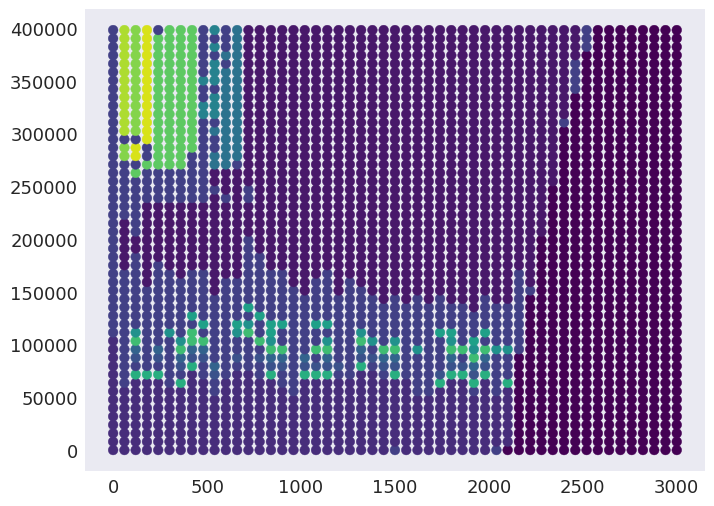

In [ ]:
# plot H vs T with with different colors for each cluster
import matplotlib.pyplot as plt

# Create a list of unique clusters
unique_clusters = df["cluster"].unique()

# Assign a color for each cluster (using a colormap, e.g., 'viridis')
cmap = plt.cm.jet
colors = [cmap(i / len(unique_clusters)) for i in range(len(unique_clusters))]

# Map the cluster labels to the corresponding colors
color_map = {cluster: colors[i] for i, cluster in enumerate(unique_clusters)}
df["color"] = df["cluster"].map(color_map)

# Plot with colors based on cluster
plt.scatter(df["T (K)"], df["H (A/m)"], c=df["color"], marker="o")
plt.show()